<a href="https://colab.research.google.com/github/alanRiveros/machineLearning/blob/master/LogisticRegretionPytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión logística

In [0]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

In [2]:
n = 100
h = n//2
dimen = 2

data = np.random.randn(n, dimen)*3
data

array([[-0.87379531, -2.92515675],
       [-2.02203554,  4.12751048],
       [-4.08137993,  0.07609606],
       [-4.28513086,  5.55928867],
       [-0.48823902,  0.06352572],
       [ 2.28136975, -1.76271634],
       [ 0.44678918,  2.21488504],
       [-4.51042326, -0.75378637],
       [-0.32497839,  3.41308585],
       [ 4.23219858,  3.06507584],
       [-2.15498688,  1.34898453],
       [-4.19283134, -3.03616454],
       [-6.42740862,  3.67127344],
       [-1.21942803, -0.5451906 ],
       [-2.43184306,  2.06299942],
       [ 2.30934799,  2.68840859],
       [-1.43531372,  4.73340225],
       [ 3.45522742, -2.82002689],
       [-0.1387692 ,  0.22184337],
       [-0.7413989 , -4.04723113],
       [ 2.13712901,  4.42381679],
       [ 3.05931175,  1.02424795],
       [ 2.1050424 , -2.36911574],
       [-2.99945533, -0.61858963],
       [ 3.71108797,  6.57440439],
       [-1.15413927,  1.9517952 ],
       [-3.90218684,  3.00153125],
       [ 0.91406645,  5.47908807],
       [ 0.49898331,

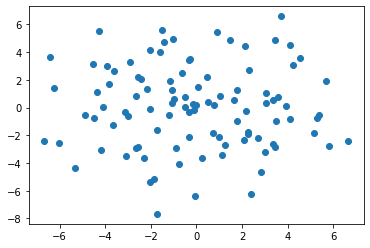

In [3]:
plt.scatter(data[:,0], data[:,1])

In [0]:
data[:h, :] = data[:h, :] - 3*np.ones((h, dimen))

In [0]:
data[:h, :] = data[h:, :] + 3*np.ones((h, dimen))

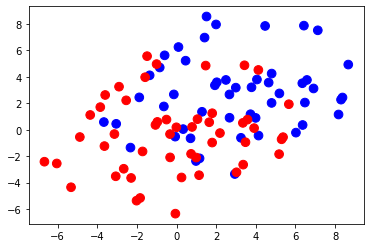

In [6]:
colors = ['blue', 'red']

color = np.array([colors[0]]*h + [colors[1]]*h).reshape(n)
plt.scatter(data[:,0], data[:,1], c=color, s=75)

In [7]:
target = np.array([0]*h + [1]*h).reshape(n, 1)
x = torch.from_numpy(data).float().requires_grad_(True)
y = torch.from_numpy(target).float()

x.shape, y.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

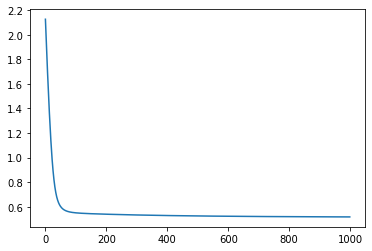

In [8]:

model = nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)
loss_function = nn.BCELoss()

optimizer = optim.SGD(model.parameters(), lr= 0.01)

losses = []
iterations = 1000

for i in range(iterations):
  result = model(x)
  loss = loss_function(result, y)
  losses.append(loss.data)
  optimizer.zero_grad()
  loss.backward()

  optimizer.step()

plt.plot(range(iterations), losses)

In [9]:
blue = torch.Tensor([[-5, -6]])
prediction = model(blue).data[0][0] > 0.5
print(colors[prediction])

red = torch.Tensor([[8, 6]])
prediction = model(red).data[0][0] > 0.5
print(colors[prediction])

red
blue
